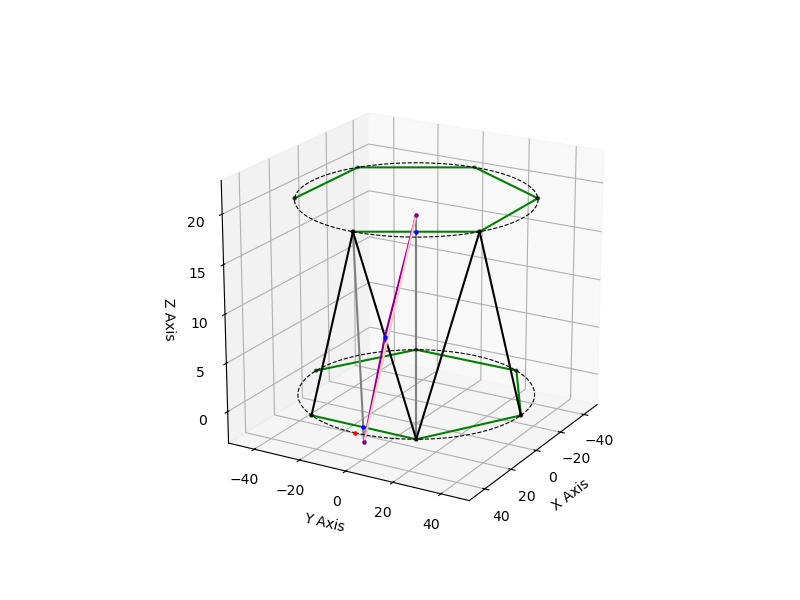

In [101]:
%matplotlib widget

from tkinter import Y
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 6
r = 45
angle_shift_deg = 360 / ( n * 2 )
height = 20
h = height
angle_increment = 360 / n
alpha_demi = angle_increment / 2 

polygon_edges_length = 2 * ( r * np.sin(np.radians(alpha_demi) ) ) 

layer_0_points = [(r * np.cos(np.radians(i * angle_increment - angle_shift_deg)),
                   r * np.sin(np.radians(i * angle_increment - angle_shift_deg)), 0)
                  for i in range(n)]

layer_1_points = [(r * np.cos(np.radians(i * angle_increment + angle_shift_deg - angle_shift_deg)),
                   r * np.sin(np.radians(i * angle_increment + angle_shift_deg - angle_shift_deg)), height)
                  for i in range(n)]

x_0 = [p[0] for p in layer_0_points]
y_0 = [p[1] for p in layer_0_points]
z_0 = [p[2] for p in layer_0_points]

x_1 = [p[0] for p in layer_1_points]
y_1 = [p[1] for p in layer_1_points]
z_1 = [p[2] for p in layer_1_points]

x_1_on_0 = x_1[0]
y_1_on_0 = y_1[0]
z_1_on_0 = 0


x_2 = (x_0[0] + x_0[1]) / 2 
y_2 = (y_0[0] + y_0[1]) / 2 
z_2 = (z_0[0] + z_0[1]) / 2 

x_3 = (x_1[0] + x_1[1]) / 2 
y_3 = (y_1[0] + y_1[1]) / 2 
z_3 = (z_1[0] + z_1[1]) / 2 

a = r * (1 - np.cos(np.radians(alpha_demi)))
e = np.sqrt(h*h + a*a)
f = r * np.sin(np.radians(alpha_demi))
g = np.sqrt(e*e + f*f)
g2 = np.sqrt( np.pow( x_1[0]-x_0[1] , 2 ) + np.pow( y_1[0]-y_0[1] , 2 ) + np.pow( z_1[0]-z_0[1] , 2 ) )
alpha_2 = np.arccos(e / g)
h2 = (g / 2) / np.cos(alpha_2)
i = e - h2 
j = ( i / e ) * h
k = ( i / e ) * a 

x_int_1 = x_2 + k 
y_int_1 = y_2
z_int_1 = z_2 + j

j2 = (h2 / e) * h  
k2 = (h2 / e) * a 

x_int_2 = x_0[1] - k2 * np.cos(np.radians(alpha_demi))
y_int_2 = y_0[1] - k2 * np.sin(np.radians(alpha_demi))
z_int_2 = z_0[1] + j2

x_4 = (x_0[1] + x_1[0]) / 2 
y_4 = (y_0[1] + y_1[0]) / 2 
z_4 = (z_0[1] + z_1[0]) / 2 

# Dashed circular outline
circle_theta = np.linspace(0, 2 * np.pi, 200)
circle_x = r * np.cos(circle_theta)
circle_y = r * np.sin(circle_theta)
circle_z_bottom = np.zeros_like(circle_theta)
circle_z_top = np.ones_like(circle_theta) * height

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=30)

ax.scatter(x_0, y_0, z_0, s=5, color='black')
ax.scatter(x_1, y_1, z_1, s=5, color='black')
ax.scatter(x_1_on_0, y_1_on_0, z_1_on_0, s=5, color='red')
ax.scatter(x_2, y_2, z_2, s=5, color='blue')
ax.scatter(x_3, y_3, z_3, s=5, color='blue')
ax.scatter(x_int_1, y_int_1, z_int_1, s=5, color='purple')
ax.scatter(x_int_2, y_int_2, z_int_2, s=5, color='purple')
ax.scatter(x_4, y_4, z_4, s=5, color='blue')

ax.plot(x_0, y_0, z_0, color='green')
ax.plot(x_1, y_1, z_1, color='green')
ax.plot((x_2, x_int_1), (y_2, y_int_1), (z_2, z_int_1), color='gray')
ax.plot((x_int_1, x_1[0]), (y_int_1, y_1[0]), (z_int_1, z_1[0]), color='gray')
ax.plot((x_3, x_int_2), (y_3, y_int_2), (z_3, z_int_2), color='gray')
ax.plot((x_int_2, x_0[1]), (y_int_2, y_0[1]), (z_int_2, z_0[1]), color='gray')
ax.plot((x_0[0], x_1[0]), (y_0[0], y_1[0]), (z_0[0], z_1[0]), color='black')
ax.plot((x_0[1], x_1[0]), (y_0[1], y_1[0]), (z_0[1], z_1[0]), color='black')
ax.plot((x_0[1], x_1[1]), (y_0[1], y_1[1]), (z_0[1], z_1[1]), color='black')
ax.plot((x_0[2], x_1[1]), (y_0[2], y_1[1]), (z_0[2], z_1[1]), color='black')
ax.plot((x_int_2, x_4), (y_int_2, y_4), (z_int_2, z_4), color='purple')
ax.plot((x_int_1, x_4), (y_int_1, y_4), (z_int_1, z_4), color='purple')

ax.plot(circle_x, circle_y, circle_z_bottom, linestyle='dashed', color='black', linewidth=0.8)
ax.plot(circle_x, circle_y, circle_z_top, linestyle='dashed', color='black', linewidth=0.8)

ax.plot((x_int_1, x_int_2), (y_int_1, y_int_2), (z_int_1, z_int_2), color='pink')
intersect_line = ( g / 2 ) * np.tan( alpha_2 )
dist_intersect = np.sqrt( np.pow( (x_int_1 - x_int_2), 2 ) +  np.pow( (y_int_1 - y_int_2), 2 ) +  np.pow( (z_int_1 - z_int_2), 2 ) )
alpha_3 = np.arccos( ( dist_intersect / 2 ) / intersect_line ) 
alpha_3_degree = np.degrees( alpha_3 )

(x_int_1, x_4), (y_int_1, y_4), (z_int_1, z_4)
(x_1[0], x_4), (y_1[0], y_4), (y_1[0], y_4)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [102]:
print( polygon_edges_length )

44.99999999999999


In [85]:
print( h2 )

43.82073490094745


In [103]:
print( alpha_3_degree + 90)

112.35860943323271


In [104]:
g = np.sqrt(e*e + f*f)
g2 = np.sqrt( np.pow( x_1[0]-x_0[1] , 2 ) + np.pow( y_1[0]-y_0[1] , 2 ) + np.pow( z_1[0]-z_0[1] , 2 ) )
e2 = np.sqrt( np.pow( x_1[0]-x_2, 2 ) + np.pow( y_1[0]-y_2 , 2 ) + np.pow( z_1[0]-y_2 , 2 ) )
print( g )
print( g2 )

print(e)
print(e2)


30.701744489084383
30.701744489084383
20.888923253078975
20.888923253078975


In [93]:
import numpy as np

# Define the points
p1 = np.array([x_int_2, y_int_2, z_int_2])
p2 = np.array([x_4, y_4, z_4])
p3 = np.array([x_0[1], y_0[1], z_0[1]])

# Define the vectors
vec1 = p1 - p2  # from x_4 to x_int_1
vec2 = p3 - p2  # from x_4 to x_1[0]

# Compute the angle between the vectors
dot_product = np.dot(vec1, vec2)
norms = np.linalg.norm(vec1) * np.linalg.norm(vec2)
cos_angle = np.clip(dot_product / norms, -1.0, 1.0)  # Clip for numerical stability
angle_rad = np.arccos(cos_angle)
angle_deg = np.degrees(angle_rad)

print(f"Angle between vectors: {angle_deg:.2f} degrees")

Angle between vectors: 90.00 degrees


In [94]:
import numpy as np

# Define the points
p1 = np.array([x_int_1, y_int_1, z_int_1])
p2 = np.array([x_4, y_4, z_4])
p3 = np.array([x_1[0], y_1[0], z_1[0]])

# Define the vectors
vec1 = p1 - p2  # from x_4 to x_int_1
vec2 = p3 - p2  # from x_4 to x_1[0]

# Compute the angle between the vectors
dot_product = np.dot(vec1, vec2)
norms = np.linalg.norm(vec1) * np.linalg.norm(vec2)
cos_angle = np.clip(dot_product / norms, -1.0, 1.0)  # Clip for numerical stability
angle_rad = np.arccos(cos_angle)
angle_deg = np.degrees(angle_rad)

print(f"Angle between vectors: {angle_deg:.2f} degrees")

Angle between vectors: 90.00 degrees


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 6
r = 20
angle_shift_deg = 360 / ( n * 2 )
height = 20
angle_increment = 360 / n

# Generate bottom and top polygons
Bottom_layer_points = [(r * np.cos(np.radians(i * angle_increment)),
                        r * np.sin(np.radians(i * angle_increment)), -height)
                       for i in range(n)]
Bottom_layer_points.append(Bottom_layer_points[0])

Top_layer_points = [(r * np.cos(np.radians(i * angle_increment )),
                     r * np.sin(np.radians(i * angle_increment )), height)
                    for i in range(n)]
Top_layer_points.append(Top_layer_points[0])

Middle_layer_points = [(r * np.cos(np.radians(i * angle_increment + angle_shift_deg)),
                     r * np.sin(np.radians(i * angle_increment + angle_shift_deg)), 0)
                    for i in range(n)]

Middle_layer_points_show = np.stack( Middle_layer_points + [Middle_layer_points[0]] )

x_bottom = [p[0] for p in Bottom_layer_points]
y_bottom = [p[1] for p in Bottom_layer_points]
z_bottom = [p[2] for p in Bottom_layer_points]

x_top = [p[0] for p in Top_layer_points]
y_top = [p[1] for p in Top_layer_points]
z_top = [p[2] for p in Top_layer_points]

x_middle = [p[0] for p in Middle_layer_points_show]
y_middle = [p[1] for p in Middle_layer_points_show]
z_middle = [p[2] for p in Middle_layer_points_show]


fig = plt.figure(figsize=(8, 6))  # fixed size
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])  # Equal scaling in 3D
ax.view_init(elev=20, azim=30)  # fixed viewing angle

ax.scatter(x_bottom, y_bottom, z_bottom, s=50, color='green')
ax.plot(x_bottom, y_bottom, z_bottom, color='green', label='Bottom layer')

ax.scatter(x_middle, y_middle, z_middle, s=50, color = 'purple')
ax.plot(x_middle, y_middle, z_middle, color = 'purple', label='Middle layer')

ax.scatter(x_top, y_top, z_top, s=50, color='red')
ax.plot(x_top, y_top, z_top, color='red', label='Top layer')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Top and Bottom Polygons of a Yoshimura Unit Cell')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.tight_layout()
plt.savefig("YoshimuraPics/Yoshimura_polygons.png", dpi=300, bbox_inches='tight')
plt.show()

# Create fold lines
valley_lines = [(Middle_layer_points[(i*2)], Middle_layer_points[(i*2)+1]) for i in range(int(n/2))]
mountain_lines = [(Middle_layer_points[(i*2)-1], Middle_layer_points[(i*2)]) for i in range(int(n/2))]
mountain2_lines = [(Middle_layer_points[i], Top_layer_points[i]) for i in range(n)]
mountain3_lines = [(Middle_layer_points[i], Bottom_layer_points[i]) for i in range(n)]
mountain4_lines = [(Middle_layer_points[i], Top_layer_points[i+1]) for i in range(n)]
mountain5_lines = [(Middle_layer_points[i], Bottom_layer_points[i+1]) for i in range(n)]

fig = plt.figure(figsize=(8, 6))  # fixed size
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])  # Equal axis scaling
ax.view_init(elev=20, azim=30)  # same viewing angle

# Draw top and bottom polygons
ax.plot(x_bottom, y_bottom, z_bottom, color='black')
ax.scatter(x_bottom, y_bottom, z_bottom, s=50, color='black')

ax.plot(x_top, y_top, z_top, color='black')
ax.scatter(x_top, y_top, z_top, s=50, color='black')

# ax.plot(x_middle, y_middle, z_middle, color='black')
# ax.scatter(x_middle, y_middle, z_middle, s=50, color='black')

# Draw folds
for i in range(n):
    x_m, y_m, z_m = zip(*mountain2_lines[i])
    ax.plot(x_m, y_m, z_m, color='red')

for i in range(n):
    x_m, y_m, z_m = zip(*mountain3_lines[i])
    ax.plot(x_m, y_m, z_m, color='red')

for i in range(n):
    x_m, y_m, z_m = zip(*mountain4_lines[i])
    ax.plot(x_m, y_m, z_m, color='red')

for i in range(n):
    x_m, y_m, z_m = zip(*mountain5_lines[i])
    ax.plot(x_m, y_m, z_m, color='red', label='Mountain Fold' if i == 0 else "")

for i in range(int(n/2)):
    print(i)
    x_m, y_m, z_m = zip(*mountain_lines[i])
    ax.plot(x_m, y_m, z_m, color='blue')

for i in range(int(n/2)):
    x_v, y_v, z_v = zip(*valley_lines[i])
    ax.plot(x_v, y_v, z_v, color='blue', label='Valley Fold' if i == 0 else "")

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Yoshimura Pattern with Mountain and Valley Folds')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.tight_layout()
plt.savefig("YoshimuraPics/Yoshimura_folds.png", dpi=300, bbox_inches='tight')
plt.show()